# Objective

Develop ways to get a more aggregated diameter at the maximum cross section.

# Dataset

50 Yassiada amphoras.

# Conclusion

1. Demo of computation diameter measurement methods (displayed alongside physical diameter measurement) using 83-2
2. Computational diameter measurements (displayed alongside physical diameter measurement) for all 50 amphoras
3. Visualizations comparing the physical and computation diameter measurements, accompanied by observations
4. Conclusion

In [39]:
import circularity_util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
import math
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demo of computation diameter measurement methods

Using 83-2

### Input:

- path to image file
- diameter in CloudCompare (to fix scaling), along the same axis as the handle attachments, like this:
<img src="finding ref diameter in cc - birdseye view.png" width="400"> 
<img src="finding ref diameter in cc - front view.png" width="400"> 

In [17]:
model = '83-2'
ref_diameter = 40.000
physically_measured_diameter = 40.7

### Run this block:

In [63]:
im_path = './birdseye/birdseye_%s.png' % model
im = imread(im_path)
bin_im = circularity_util.get_bin_im(im_path)
xmin, xmax, ymin, ymax = circularity_util.get_shape_bounds(bin_im)
flood_im = circularity_util.flood(bin_im, ymin, ymax)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(im)
axes[0].axis('off')

axes[1].imshow(flood_im, cmap='gray_r')
axes[1].axis('off')

plt.show()

perimeter = circularity_util.get_perimeter(flood_im)
area = circularity_util.get_area(flood_im)

scaling_ratio = ref_diameter/(xmax - xmin)

width_of_blob = (xmax - xmin)*scaling_ratio
height_of_blob = (ymax - ymin)*scaling_ratio
diameter_from_perimeter = (perimeter/math.pi)*scaling_ratio
diameter_from_area = 2*math.sqrt(area/math.pi)*scaling_ratio
print('diameter physically measured\t\t\t\t\t\t\t', round(physically_measured_diameter, 3))
print('diameter of amphora along same axis as handle attachments\t\t\t', round(width_of_blob, 3))
print('diameter of amphora along axis perpendicular to handle attachments\t\t', round(height_of_blob, 3))
print('diameter calculated from ideal circle that has area of max cross section\t', round(diameter_from_perimeter, 3))
print('diameter calculated from ideal circle that has perimeter of max cross section\t', round(diameter_from_area, 3))

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 32.2
diameter of amphora along axis perpendicular to handle attachments		 32.529
diameter calculated from ideal circle that has area of max cross section	 32.618
diameter calculated from ideal circle that has perimeter of max cross section	 32.393


# Max diameter methods, all amphoras

In [92]:
df = pd.read_csv('models.csv', delimiter=',')
models = list(df.model)

In [3]:
print('\nAmphoras in dataset:\n')
for i in range(int(len(models)/5)):
    print('%s\t%s\t%s\t%s\t%s' % (models[i*5], models[i*5+1], models[i*5+2], models[i*5+3], models[i*5+4]))
print('\n')


Amphoras in dataset:

83-2	84-1	84-3	84-10	86-38
86-75	86-85	86-90	86-92	86-93
86-95	86-96	86-99	86-100	86-113
C	D	F	UN16	W1
W8	W43	W55	W63	W69
W70	W74	W77	X5	X12
Y2	Y7	Y11	Y12	Y14
Y15	Y22	Y28	Y32	Y34
Y39	Y45	Y114	Y123	Y126
Y127	Y128	Y135	Y148	Y149




In [75]:
phys_diameters = list(pd.read_csv('bodies_group_data.csv').diameter)
ref_diameters = list(pd.read_csv('cc_diameters.csv').cc_diameter)

model: 83-2


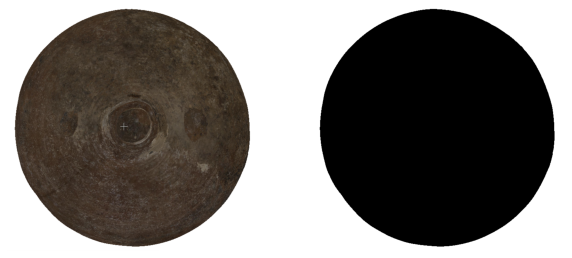

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.7
diameter of amphora along axis perpendicular to handle attachments		 41.02
diameter calculated from ideal circle that has area of max cross section	 41.063
diameter calculated from ideal circle that has perimeter of max cross section	 40.827




model: 84-1


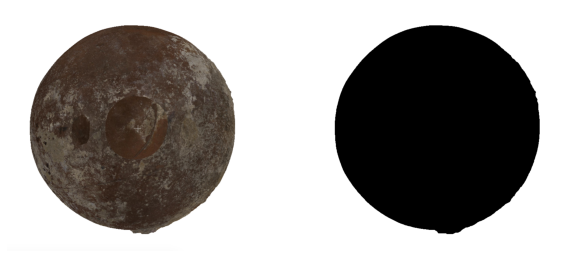

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.0
diameter of amphora along axis perpendicular to handle attachments		 41.693
diameter calculated from ideal circle that has area of max cross section	 41.656
diameter calculated from ideal circle that has perimeter of max cross section	 41.12




model: 84-3


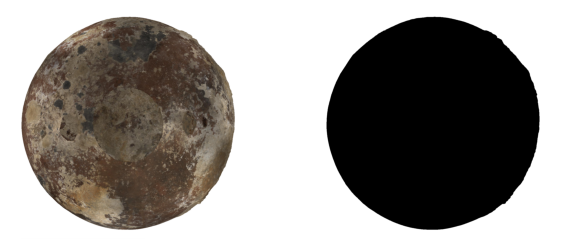

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.2
diameter of amphora along axis perpendicular to handle attachments		 41.054
diameter calculated from ideal circle that has area of max cross section	 41.528
diameter calculated from ideal circle that has perimeter of max cross section	 41.039




model: 84-10


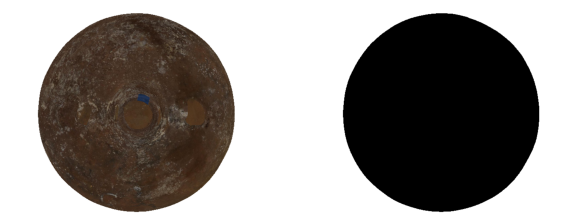

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.6
diameter of amphora along axis perpendicular to handle attachments		 41.033
diameter calculated from ideal circle that has area of max cross section	 41.105
diameter calculated from ideal circle that has perimeter of max cross section	 40.85




model: 86-38


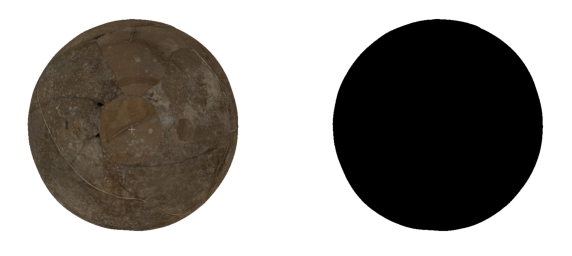

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.3
diameter of amphora along axis perpendicular to handle attachments		 40.571
diameter calculated from ideal circle that has area of max cross section	 40.75
diameter calculated from ideal circle that has perimeter of max cross section	 40.49




model: 86-75


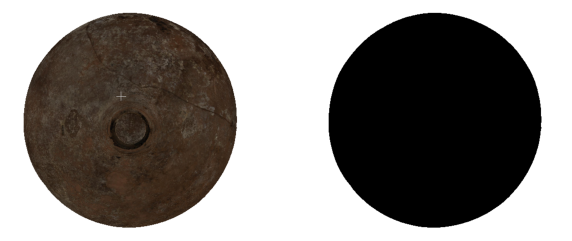

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.8
diameter of amphora along axis perpendicular to handle attachments		 41.082
diameter calculated from ideal circle that has area of max cross section	 41.24
diameter calculated from ideal circle that has perimeter of max cross section	 40.973




model: 86-85


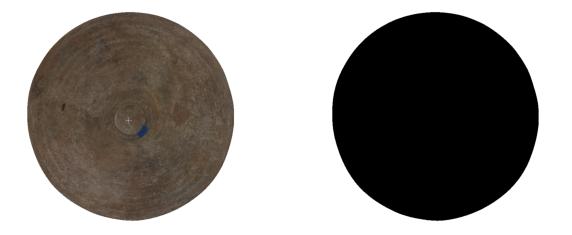

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.1
diameter of amphora along axis perpendicular to handle attachments		 40.476
diameter calculated from ideal circle that has area of max cross section	 40.561
diameter calculated from ideal circle that has perimeter of max cross section	 40.334




model: 86-90


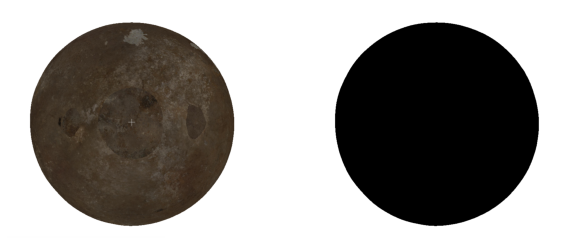

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 36.0
diameter of amphora along axis perpendicular to handle attachments		 35.88
diameter calculated from ideal circle that has area of max cross section	 36.156
diameter calculated from ideal circle that has perimeter of max cross section	 35.955




model: 86-92


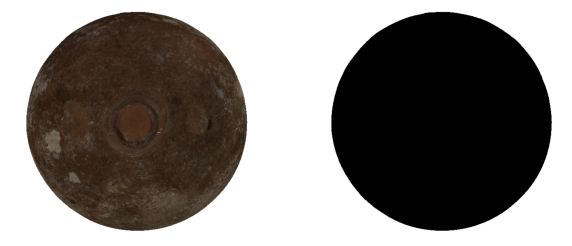

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.0
diameter of amphora along axis perpendicular to handle attachments		 39.625
diameter calculated from ideal circle that has area of max cross section	 40.073
diameter calculated from ideal circle that has perimeter of max cross section	 39.812




model: 86-93


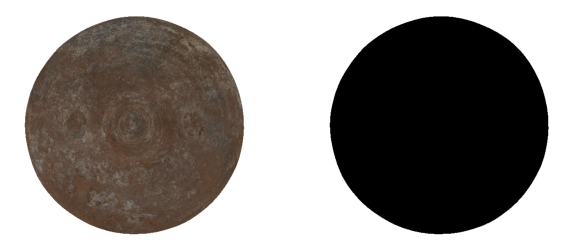

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.8
diameter of amphora along axis perpendicular to handle attachments		 41.469
diameter calculated from ideal circle that has area of max cross section	 41.87
diameter calculated from ideal circle that has perimeter of max cross section	 41.617




model: 86-95


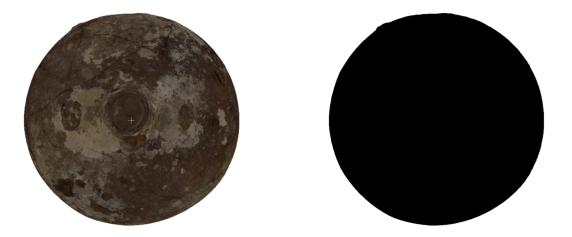

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 42.7
diameter of amphora along axis perpendicular to handle attachments		 42.128
diameter calculated from ideal circle that has area of max cross section	 42.853
diameter calculated from ideal circle that has perimeter of max cross section	 42.538




model: 86-96


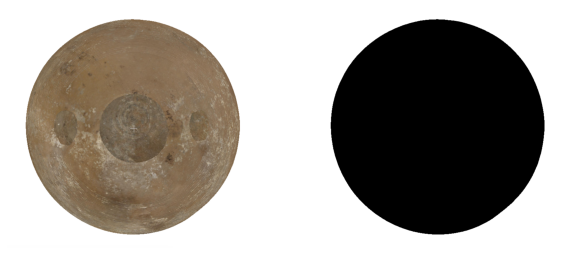

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.6
diameter of amphora along axis perpendicular to handle attachments		 41.802
diameter calculated from ideal circle that has area of max cross section	 41.899
diameter calculated from ideal circle that has perimeter of max cross section	 41.667




model: 86-99


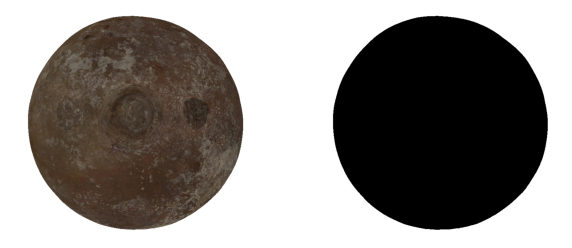

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 39.9
diameter of amphora along axis perpendicular to handle attachments		 39.639
diameter calculated from ideal circle that has area of max cross section	 40.048
diameter calculated from ideal circle that has perimeter of max cross section	 39.808




model: 86-100


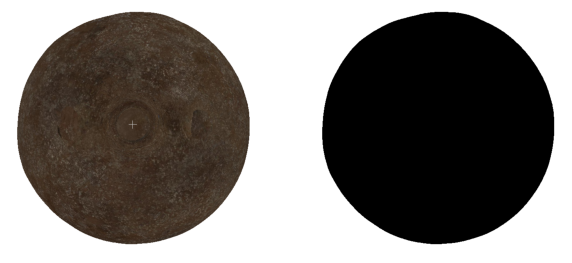

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.8
diameter of amphora along axis perpendicular to handle attachments		 40.8
diameter calculated from ideal circle that has area of max cross section	 41.131
diameter calculated from ideal circle that has perimeter of max cross section	 40.883




model: 86-113


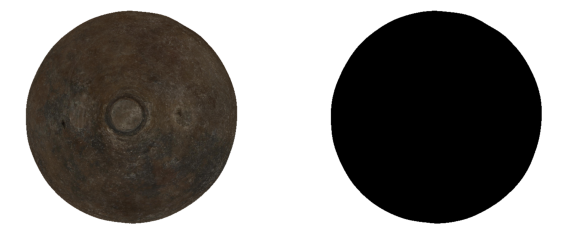

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.4
diameter of amphora along axis perpendicular to handle attachments		 41.723
diameter calculated from ideal circle that has area of max cross section	 41.805
diameter calculated from ideal circle that has perimeter of max cross section	 41.556




model: C


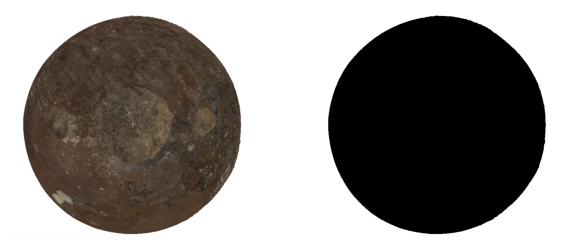

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 44.7
diameter of amphora along axis perpendicular to handle attachments		 44.7
diameter calculated from ideal circle that has area of max cross section	 45.001
diameter calculated from ideal circle that has perimeter of max cross section	 44.651




model: D


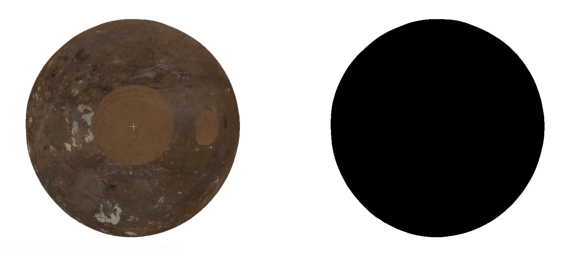

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 42.0
diameter of amphora along axis perpendicular to handle attachments		 42.679
diameter calculated from ideal circle that has area of max cross section	 42.547
diameter calculated from ideal circle that has perimeter of max cross section	 42.305




model: F


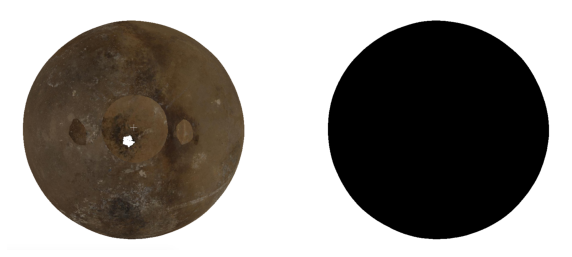

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 43.5
diameter of amphora along axis perpendicular to handle attachments		 43.022
diameter calculated from ideal circle that has area of max cross section	 43.432
diameter calculated from ideal circle that has perimeter of max cross section	 43.191




model: UN16


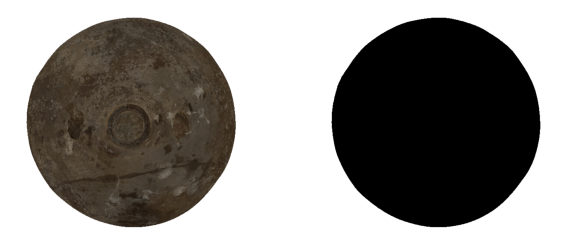

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 42.3
diameter of amphora along axis perpendicular to handle attachments		 42.3
diameter calculated from ideal circle that has area of max cross section	 42.497
diameter calculated from ideal circle that has perimeter of max cross section	 42.216




model: W1


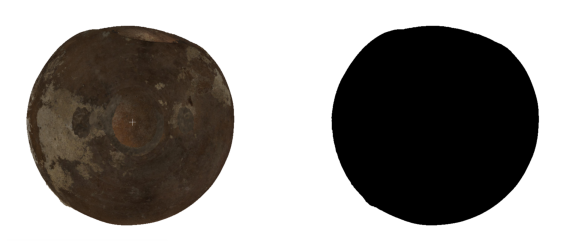

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.8
diameter of amphora along axis perpendicular to handle attachments		 39.091
diameter calculated from ideal circle that has area of max cross section	 40.555
diameter calculated from ideal circle that has perimeter of max cross section	 40.207




model: W8


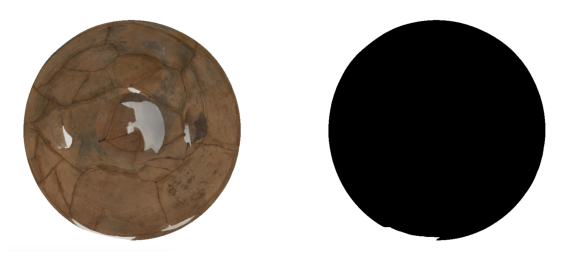

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 42.4
diameter of amphora along axis perpendicular to handle attachments		 42.947
diameter calculated from ideal circle that has area of max cross section	 43.261
diameter calculated from ideal circle that has perimeter of max cross section	 42.673




model: W43


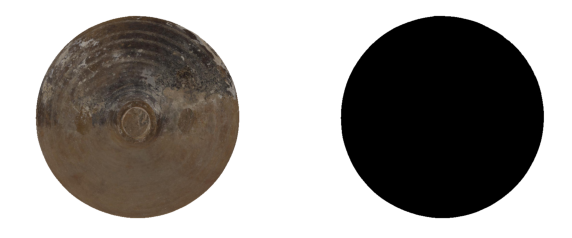

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 42.8
diameter of amphora along axis perpendicular to handle attachments		 42.489
diameter calculated from ideal circle that has area of max cross section	 42.89
diameter calculated from ideal circle that has perimeter of max cross section	 42.636




model: W55


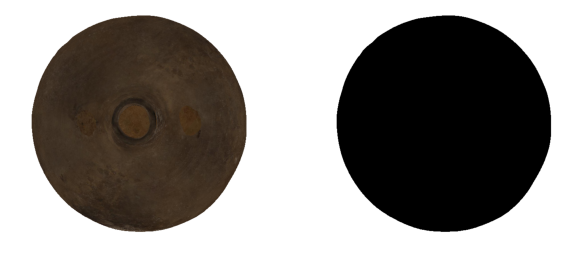

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.7
diameter of amphora along axis perpendicular to handle attachments		 42.015
diameter calculated from ideal circle that has area of max cross section	 42.222
diameter calculated from ideal circle that has perimeter of max cross section	 41.966




model: W63


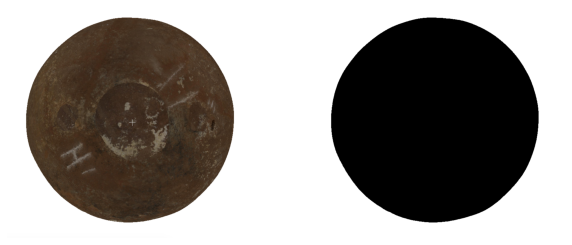

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 43.0
diameter of amphora along axis perpendicular to handle attachments		 42.384
diameter calculated from ideal circle that has area of max cross section	 42.95
diameter calculated from ideal circle that has perimeter of max cross section	 42.699




model: W69


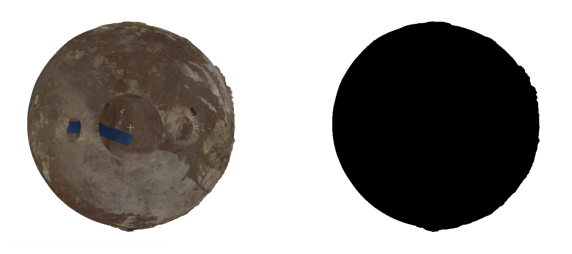

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.1
diameter of amphora along axis perpendicular to handle attachments		 41.713
diameter calculated from ideal circle that has area of max cross section	 41.823
diameter calculated from ideal circle that has perimeter of max cross section	 41.065




model: W70


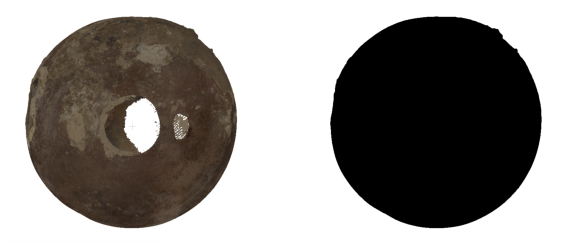

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 43.1
diameter of amphora along axis perpendicular to handle attachments		 43.1
diameter calculated from ideal circle that has area of max cross section	 43.899
diameter calculated from ideal circle that has perimeter of max cross section	 43.36




model: W74


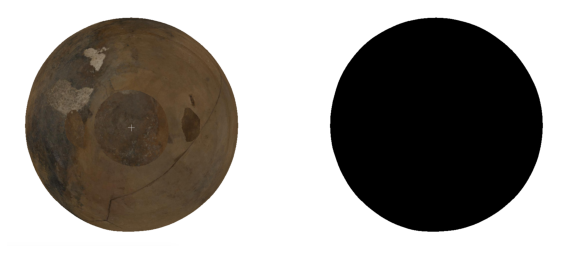

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 34.7
diameter of amphora along axis perpendicular to handle attachments		 34.867
diameter calculated from ideal circle that has area of max cross section	 35.0
diameter calculated from ideal circle that has perimeter of max cross section	 34.803




model: W77


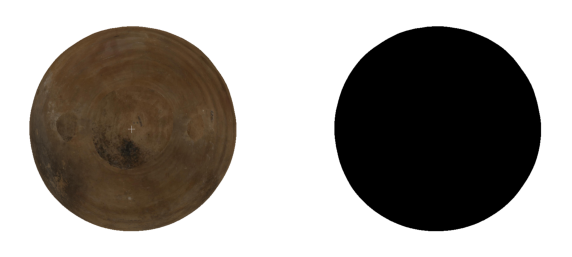

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 31.9
diameter of amphora along axis perpendicular to handle attachments		 31.509
diameter calculated from ideal circle that has area of max cross section	 31.976
diameter calculated from ideal circle that has perimeter of max cross section	 31.795




model: X5


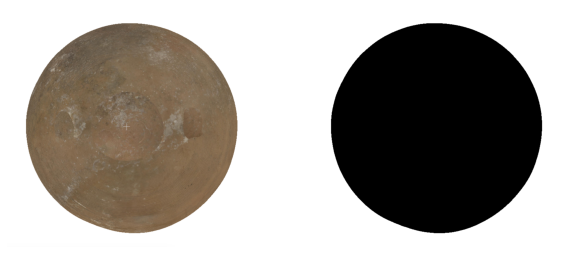

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.9
diameter of amphora along axis perpendicular to handle attachments		 41.625
diameter calculated from ideal circle that has area of max cross section	 41.967
diameter calculated from ideal circle that has perimeter of max cross section	 41.735




model: X12


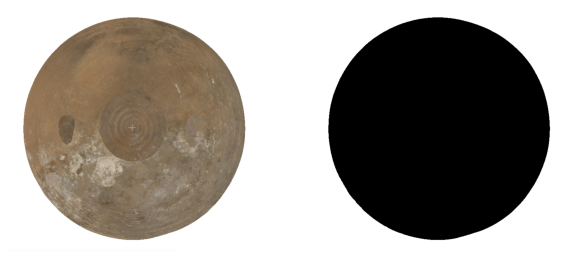

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 43.2
diameter of amphora along axis perpendicular to handle attachments		 43.269
diameter calculated from ideal circle that has area of max cross section	 43.485
diameter calculated from ideal circle that has perimeter of max cross section	 43.238




model: Y2


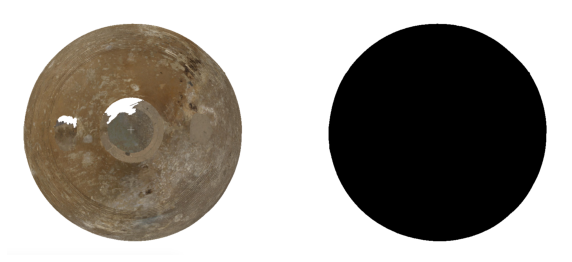

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 42.9
diameter of amphora along axis perpendicular to handle attachments		 42.692
diameter calculated from ideal circle that has area of max cross section	 43.101
diameter calculated from ideal circle that has perimeter of max cross section	 42.852




model: Y7


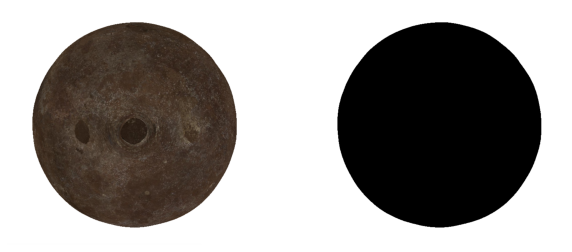

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.7
diameter of amphora along axis perpendicular to handle attachments		 41.855
diameter calculated from ideal circle that has area of max cross section	 42.073
diameter calculated from ideal circle that has perimeter of max cross section	 41.828




model: Y11


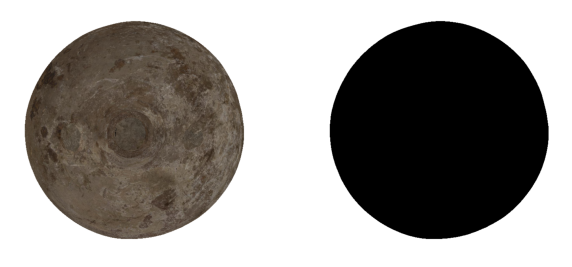

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.1
diameter of amphora along axis perpendicular to handle attachments		 40.802
diameter calculated from ideal circle that has area of max cross section	 41.098
diameter calculated from ideal circle that has perimeter of max cross section	 40.862




model: Y12


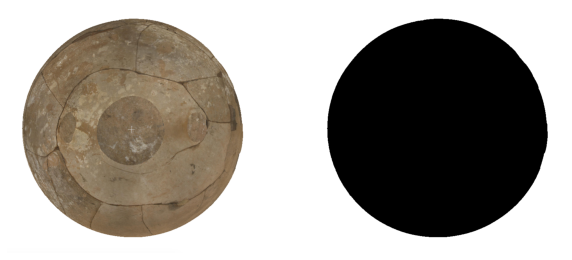

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 43.0
diameter of amphora along axis perpendicular to handle attachments		 42.451
diameter calculated from ideal circle that has area of max cross section	 42.966
diameter calculated from ideal circle that has perimeter of max cross section	 42.693




model: Y14


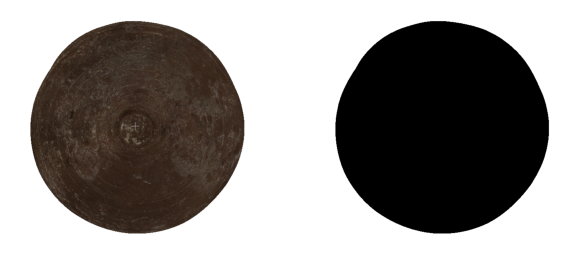

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.3
diameter of amphora along axis perpendicular to handle attachments		 40.915
diameter calculated from ideal circle that has area of max cross section	 41.351
diameter calculated from ideal circle that has perimeter of max cross section	 41.1




model: Y15


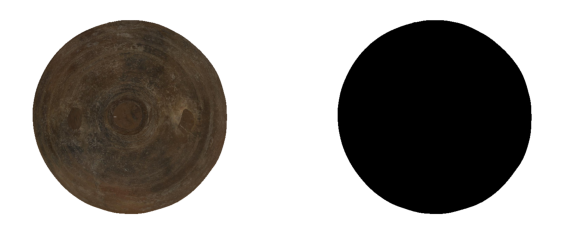

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.6
diameter of amphora along axis perpendicular to handle attachments		 41.431
diameter calculated from ideal circle that has area of max cross section	 41.804
diameter calculated from ideal circle that has perimeter of max cross section	 41.543




model: Y22


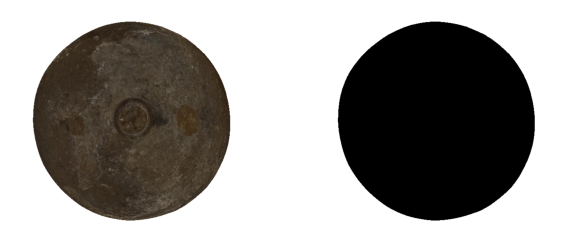

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.5
diameter of amphora along axis perpendicular to handle attachments		 40.754
diameter calculated from ideal circle that has area of max cross section	 40.912
diameter calculated from ideal circle that has perimeter of max cross section	 40.644




model: Y28


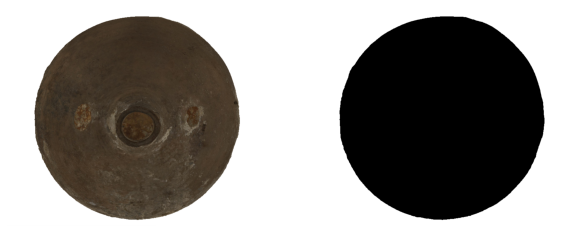

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 39.9
diameter of amphora along axis perpendicular to handle attachments		 39.508
diameter calculated from ideal circle that has area of max cross section	 40.12
diameter calculated from ideal circle that has perimeter of max cross section	 39.785




model: Y32


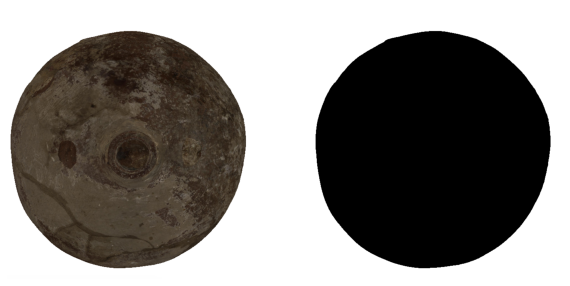

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.6
diameter of amphora along axis perpendicular to handle attachments		 41.016
diameter calculated from ideal circle that has area of max cross section	 41.189
diameter calculated from ideal circle that has perimeter of max cross section	 40.91




model: Y34


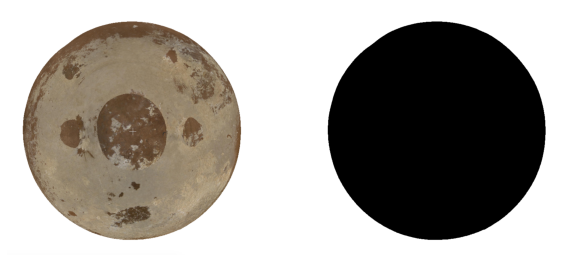

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 42.0
diameter of amphora along axis perpendicular to handle attachments		 41.932
diameter calculated from ideal circle that has area of max cross section	 42.261
diameter calculated from ideal circle that has perimeter of max cross section	 42.005




model: Y39


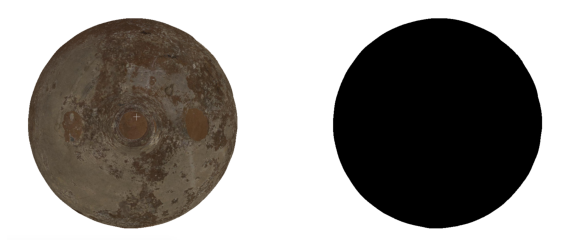

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.8
diameter of amphora along axis perpendicular to handle attachments		 41.87
diameter calculated from ideal circle that has area of max cross section	 42.065
diameter calculated from ideal circle that has perimeter of max cross section	 41.803




model: Y45


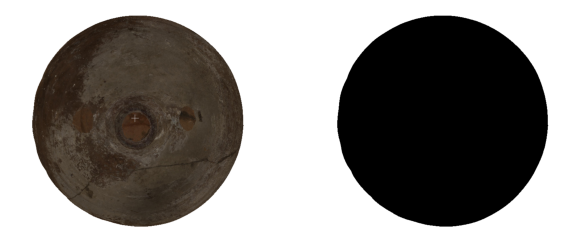

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.9
diameter of amphora along axis perpendicular to handle attachments		 41.752
diameter calculated from ideal circle that has area of max cross section	 42.068
diameter calculated from ideal circle that has perimeter of max cross section	 41.817




model: Y114


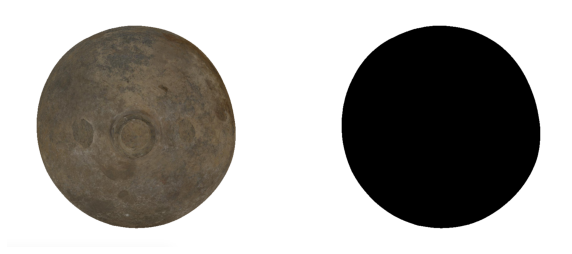

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.3
diameter of amphora along axis perpendicular to handle attachments		 41.97
diameter calculated from ideal circle that has area of max cross section	 41.954
diameter calculated from ideal circle that has perimeter of max cross section	 41.704




model: Y123


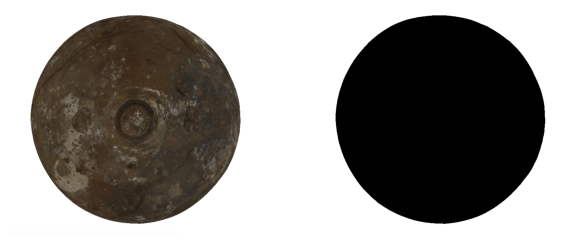

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 41.9
diameter of amphora along axis perpendicular to handle attachments		 41.553
diameter calculated from ideal circle that has area of max cross section	 41.881
diameter calculated from ideal circle that has perimeter of max cross section	 41.636




model: Y126


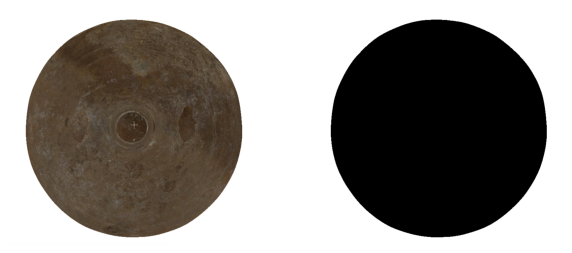

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 42.6
diameter of amphora along axis perpendicular to handle attachments		 42.806
diameter calculated from ideal circle that has area of max cross section	 43.124
diameter calculated from ideal circle that has perimeter of max cross section	 42.887




model: Y127


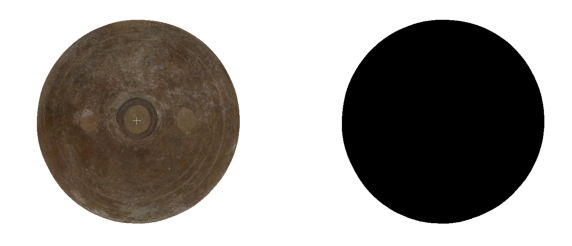

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 42.3
diameter of amphora along axis perpendicular to handle attachments		 42.382
diameter calculated from ideal circle that has area of max cross section	 42.65
diameter calculated from ideal circle that has perimeter of max cross section	 42.393




model: Y128


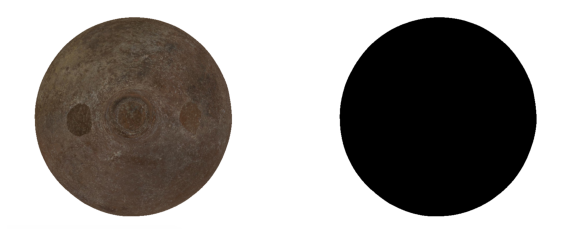

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 40.8
diameter of amphora along axis perpendicular to handle attachments		 41.101
diameter calculated from ideal circle that has area of max cross section	 41.177
diameter calculated from ideal circle that has perimeter of max cross section	 40.935




model: Y135


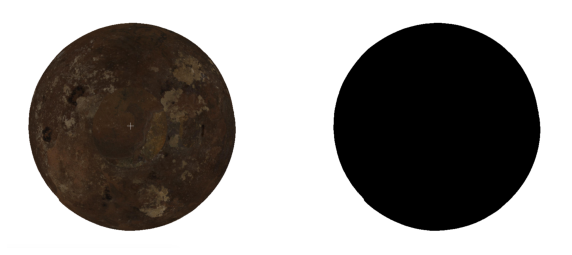

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 32.7
diameter of amphora along axis perpendicular to handle attachments		 32.755
diameter calculated from ideal circle that has area of max cross section	 32.874
diameter calculated from ideal circle that has perimeter of max cross section	 32.669




model: Y148


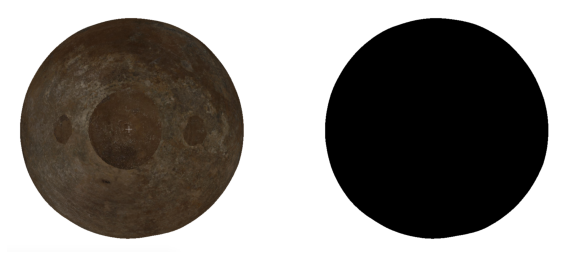

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 35.8
diameter of amphora along axis perpendicular to handle attachments		 35.3
diameter calculated from ideal circle that has area of max cross section	 35.815
diameter calculated from ideal circle that has perimeter of max cross section	 35.609




model: Y149


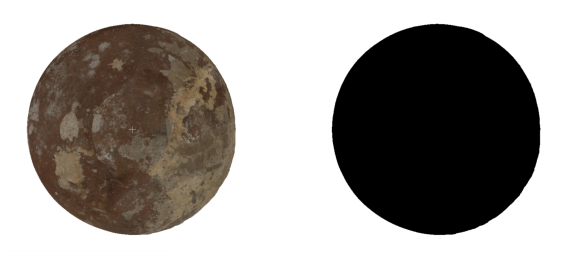

diameter physically measured							 40.7
diameter of amphora along same axis as handle attachments			 32.2
diameter of amphora along axis perpendicular to handle attachments		 32.529
diameter calculated from ideal circle that has area of max cross section	 32.618
diameter calculated from ideal circle that has perimeter of max cross section	 32.393






In [76]:
blob_widths, blob_heights, dias_from_area, dias_from_perimeter = [], [], [], []

for model, phys_diameter, ref_diameter in zip(models, phys_diameters, ref_diameters):
    
    print('model: %s' % model)
    
    im_path = './birdseye/birdseye_%s.png' % model
    im = imread(im_path)
    bin_im = circularity_util.get_bin_im(im_path)
    xmin, xmax, ymin, ymax = circularity_util.get_shape_bounds(bin_im)
    flood_im = circularity_util.flood(bin_im, ymin, ymax)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(im)
    axes[0].axis('off')

    axes[1].imshow(flood_im, cmap='gray_r')
    axes[1].axis('off')

    plt.show()

    perimeter = circularity_util.get_perimeter(flood_im)
    area = circularity_util.get_area(flood_im)

    scaling_ratio = ref_diameter/(xmax - xmin)

    width_of_blob = (xmax - xmin)*scaling_ratio
    height_of_blob = (ymax - ymin)*scaling_ratio
    diameter_from_perimeter = (perimeter/math.pi)*scaling_ratio
    diameter_from_area = 2*math.sqrt(area/math.pi)*scaling_ratio
    
    blob_widths.append(width_of_blob)
    blob_heights.append(height_of_blob)
    dias_from_area.append(diameter_from_area)
    dias_from_perimeter.append(diameter_from_perimeter)
    
    print('diameter physically measured\t\t\t\t\t\t\t', round(physically_measured_diameter, 3))
    print('diameter of amphora along same axis as handle attachments\t\t\t', round(width_of_blob, 3))
    print('diameter of amphora along axis perpendicular to handle attachments\t\t', round(height_of_blob, 3))
    print('diameter calculated from ideal circle that has area of max cross section\t', round(diameter_from_perimeter, 3))
    print('diameter calculated from ideal circle that has perimeter of max cross section\t', round(diameter_from_area, 3))
    print('\n\n===================================\n\n')
    

# Plot diameter vs. amphora index
### Amphora index is sorted from least to greatest physically measured diameter

In [86]:
phys_diameters_sorted = sorted(phys_diameters)
blob_widths_sorted = [x for _,x in sorted(zip(phys_diameters,blob_widths))]
blob_heights_sorted = [x for _,x in sorted(zip(phys_diameters,blob_heights))]
dias_from_area_sorted = [x for _,x in sorted(zip(phys_diameters,dias_from_area))]
dias_from_perimeter_sorted = [x for _,x in sorted(zip(phys_diameters,dias_from_perimeter))]

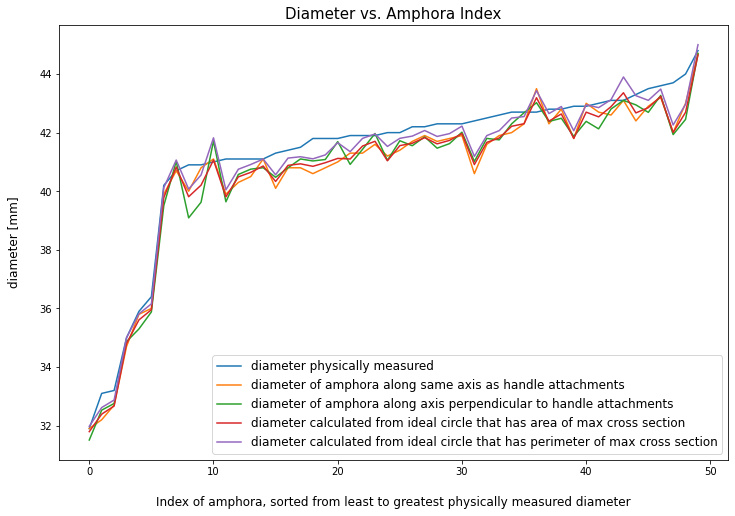

In [87]:
plt.figure(figsize=(12, 8))
p1 = plt.plot(range(len(models)), phys_diameters_sorted)
p2 = plt.plot(range(len(models)), blob_widths_sorted)
p3 = plt.plot(range(len(models)), blob_heights_sorted)
p4 = plt.plot(range(len(models)), dias_from_area_sorted)
p5 = plt.plot(range(len(models)), dias_from_perimeter_sorted)
plt.title('Diameter vs. Amphora Index', fontsize=15)
plt.xlabel('\nIndex of amphora, sorted from least to greatest physically measured diameter', fontsize=12)
labels=['diameter physically measured',
        'diameter of amphora along same axis as handle attachments',
        'diameter of amphora along axis perpendicular to handle attachments',
        'diameter calculated from ideal circle that has area of max cross section',
        'diameter calculated from ideal circle that has perimeter of max cross section']
plt.ylabel('diameter [mm]\n', fontsize=12)
plt.legend([p1, p2, p3, p4, p5], labels=labels, loc='lower right', fontsize=12)
plt.show()

## Observations

The above plot also suggests that computational methods of getting diameter measurements from the point cloud are closer to each other than they are to physical measurements of diameter. Therefore, let's plot diameter vs. amphora index, with amphora index sorted from least to greatest diameter calculated from ideal circle that has perimeter of max cross section, and diameter vs. amphora index, with amphora index sorted from least to greatest area calculated from ideal circle that has perimeter of max cross section.

# Plot diameter vs. amphora index, with amphora index sorted from least to greatest diameter calculated from perimeter.

In [113]:
dias_from_perimeter_sorted = sorted(dias_from_perimeter)
blob_widths_sorted = [x for _,x in sorted(zip(dias_from_perimeter,blob_widths))]
blob_heights_sorted = [x for _,x in sorted(zip(dias_from_perimeter,blob_heights))]
dias_from_area_sorted = [x for _,x in sorted(zip(dias_from_perimeter,dias_from_area))]
phys_diameters_sorted =  [x for _,x in sorted(zip(dias_from_perimeter,phys_diameters))]

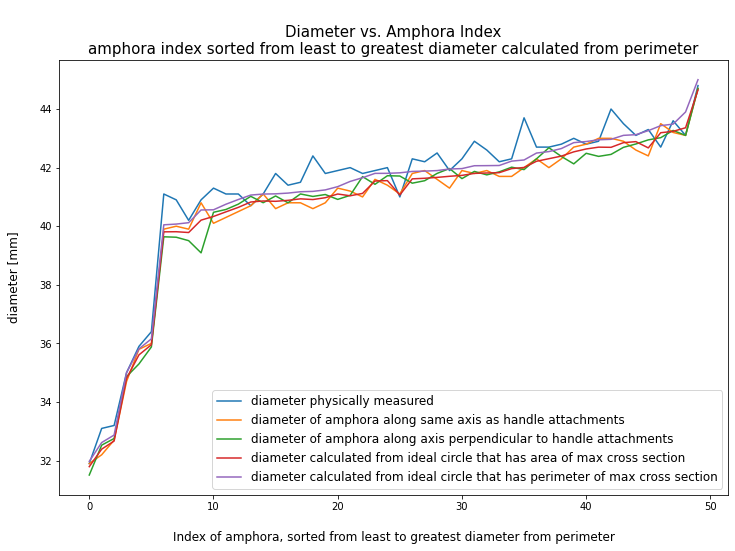

In [114]:
plt.figure(figsize=(12, 8))
p1 = plt.plot(range(len(models)), phys_diameters_sorted)
p2 = plt.plot(range(len(models)), blob_widths_sorted)
p3 = plt.plot(range(len(models)), blob_heights_sorted)
p4 = plt.plot(range(len(models)), dias_from_area_sorted)
p5 = plt.plot(range(len(models)), dias_from_perimeter_sorted)
plt.title('\nDiameter vs. Amphora Index\namphora index sorted from least to greatest diameter calculated from perimeter', fontsize=15)
plt.xlabel('\nIndex of amphora, sorted from least to greatest diameter from perimeter', fontsize=12)
labels=['diameter physically measured',
        'diameter of amphora along same axis as handle attachments',
        'diameter of amphora along axis perpendicular to handle attachments',
        'diameter calculated from ideal circle that has area of max cross section',
        'diameter calculated from ideal circle that has perimeter of max cross section']
plt.ylabel('diameter [mm]\n', fontsize=12)
plt.legend([p1, p2, p3, p4, p5], labels=labels, loc='lower right', fontsize=12)
plt.show()

In [115]:
models_sorted = [x for _,x in sorted(zip(dias_from_perimeter,models))]
print('For reference, amphoras in the order of above plot:\n(Indices assigned left to right, then top to bottom)\n')
for i in range(int(len(models_sorted)/5)):
    print('%s\t%s\t%s\t%s\t%s' % (models_sorted[i*5], models_sorted[i*5+1], models_sorted[i*5+2], models_sorted[i*5+3], models_sorted[i*5+4]))
print('\n')

For reference, amphoras in the order of above plot:
(Indices assigned left to right, then top to bottom)

W77	Y149	Y135	W74	Y148
86-90	86-99	86-92	Y28	W1
86-85	86-38	Y22	83-2	Y11
84-10	86-100	Y128	Y32	86-75
Y14	84-3	84-1	Y15	86-113
W69	86-93	Y123	86-96	Y114
X5	Y39	Y45	Y7	W55
Y34	UN16	D	Y127	86-95
W43	W63	Y12	Y2	Y126
W8	F	X12	W70	C




# Plot diameter vs. amphora index, with amphora index sorted from least to greatest diameter calculated from area.

In [116]:
dias_from_area_sorted = sorted(dias_from_area)
blob_widths_sorted = [x for _,x in sorted(zip(dias_from_area,blob_widths))]
blob_heights_sorted = [x for _,x in sorted(zip(dias_from_area,blob_heights))]
dias_from_perimeter_sorted = [x for _,x in sorted(zip(dias_from_area,dias_from_perimeter))]
phys_diameters_sorted =  [x for _,x in sorted(zip(dias_from_area,phys_diameters))]

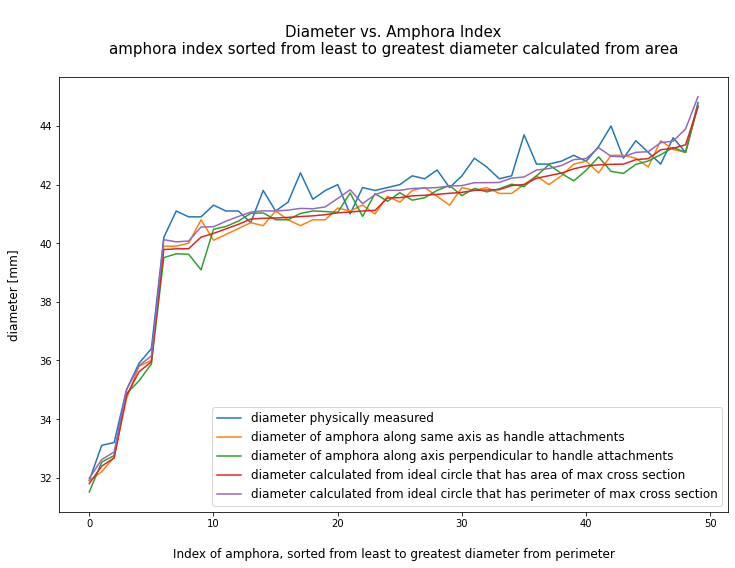

In [117]:
plt.figure(figsize=(12, 8))
p1 = plt.plot(range(len(models)), phys_diameters_sorted)
p2 = plt.plot(range(len(models)), blob_widths_sorted)
p3 = plt.plot(range(len(models)), blob_heights_sorted)
p4 = plt.plot(range(len(models)), dias_from_area_sorted)
p5 = plt.plot(range(len(models)), dias_from_perimeter_sorted)
plt.title('\nDiameter vs. Amphora Index\namphora index sorted from least to greatest diameter calculated from area\n', fontsize=15)
plt.xlabel('\nIndex of amphora, sorted from least to greatest diameter from perimeter', fontsize=12)
labels=['diameter physically measured',
        'diameter of amphora along same axis as handle attachments',
        'diameter of amphora along axis perpendicular to handle attachments',
        'diameter calculated from ideal circle that has area of max cross section',
        'diameter calculated from ideal circle that has perimeter of max cross section']
plt.ylabel('diameter [mm]\n', fontsize=12)
plt.legend([p1, p2, p3, p4, p5], labels=labels, loc='lower right', fontsize=12)
plt.show()

In [118]:
models_sorted = [x for _,x in sorted(zip(dias_from_perimeter,models))]
print('For reference, amphoras in the order of above plot:\n(Indices assigned left to right, then top to bottom)\n')
for i in range(int(len(models_sorted)/5)):
    print('%s\t%s\t%s\t%s\t%s' % (models_sorted[i*5], models_sorted[i*5+1], models_sorted[i*5+2], models_sorted[i*5+3], models_sorted[i*5+4]))
print('\n')

For reference, amphoras in the order of above plot:
(Indices assigned left to right, then top to bottom)

W77	Y149	Y135	W74	Y148
86-90	86-99	86-92	Y28	W1
86-85	86-38	Y22	83-2	Y11
84-10	86-100	Y128	Y32	86-75
Y14	84-3	84-1	Y15	86-113
W69	86-93	Y123	86-96	Y114
X5	Y39	Y45	Y7	W55
Y34	UN16	D	Y127	86-95
W43	W63	Y12	Y2	Y126
W8	F	X12	W70	C




## Further observations:

- The aggregate computational diameter measurements (diameter from area and diameter from perimeter) vary together consistently.
- Physically-measured diameter is consistently highest, but does not vary consistently with the aggregate computational diameter measurements.

# Plot difference between diameter from perimeter\nand diameter from area

In [129]:
diff = [dp - da for dp, da in zip(dias_from_perimeter_sorted, dias_from_area_sorted)]

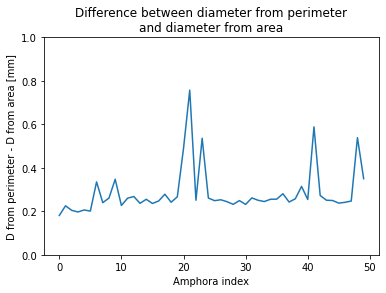

In [131]:
plt.title('Difference between diameter from perimeter\nand diameter from area')
plt.plot(range(50), diff)
plt.xlabel('Amphora index')
plt.ylabel('D from perimeter - D from area [mm]')
plt.ylim(0,1)
plt.show()

# Further observations

- Diameter from perimeter is consistently greater than diameter from area, but by always by less than 1 mm, and usually by 0.2 mm

# Conclusion

The average of diameter from perimeter and diameter from area could be a useful aggregate diameter measurement.